## Potential due to a dipole

In [1]:
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time

In [2]:
import numpy as np
import time
import cmath

class Poisson :
    def __init__ (self, L, rho_init, method, calcError = True):
        self.L = L                    # number of interior points in x and y
        self.omega = 1.88177          # over-relaxation parameter for L = 50
        self.N = L + 2                # interior plus two boundary points
        N=self.N
        self.V = np.zeros( (N, N) )   # potential to be found
        self.VNew = np.zeros( (N, N) )# new potential after each step
        self.h = 1.0 / (L + 1)        # lattice spacing assuming size in x and y = 1
        self.nsmooth = 3              # smoothing steps for multigrid method
        self.rho = np.array( rho_init )
        self.method=method        
        self.calcError = calcError
        self.error  = 0. if self.calcError else None
        self.errors = [] if self.calcError else None


    def __call__(self):
        return getattr(self,self.method)()

    def update(self):
        if self.calcError :
            self.error = np.sum( np.abs(self.V - self.VNew) ) / self.V.size
        self.V[:,:] = self.VNew[:,:]
        if self.calcError :
            self.errors.append(self.error)
            return self.error
        else :
            return None

        
    def Jacobi(self) :
        '''
        Jacobi algorithm for a single iterative step
        '''
        self.VNew = self.JacStep(self.VNew,self.V,self.h,self.rho)
        return self.update()

    def JacStep(self, u, v, h, rho):
        '''
        Jacobi algorithm on arbitrary inputs. Called once by "Jacobi".
        Called many times by "MultiGrid"
        '''
        u[1:-1,1:-1] = np.add.reduce([
            0.25*v[1:-1, 2:] ,
            0.25*v[1:-1, 0:-2],
            0.25*v[2:,   1:-1] ,
            0.25*v[0:-2, 1:-1] ,
            h**2 * rho[1:-1,1:-1]])
        return u

## Plotting the potential

In order to have a dipole of lenght d = 0.5 located at the center of a 1 x 1 box, and parallel to the x-axis, we can place a positive charge at $p_{1}$ = (0.25, 0.5) and a negative charge at $p_2$ = (0.75, 0.5). This dipole has the following potential:

In [3]:
L = 100                    # number of interior points in x and y
N = L+2                    # interior plus two boundary points
i = N // 2                 # center of lattice
h = 1/(L+1)                # lattice spacing assuming size in x and y = 1     
q = 10.0                   # point charge
rho = np.zeros((N,N))
rho[i,N//4] = q / h**2     # (+) charge density
rho[i,3*N//4] = -q / h**2  # (-) charge density

nsteps = 100
steps = np.arange(nsteps)
p = Poisson(L,rho, 'Jacobi')
for i in steps : 
    p()

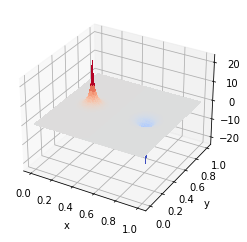

In [4]:
# Define the axes
x = np.arange(0, p.h*(p.L+2), p.h)
y = np.arange(0, p.h*(p.L+2), p.h)
# Get the grid
X, Y = np.meshgrid(x, y)
# Set Z to the poisson V[i][j]
Z = np.array( p.V )

fig = plt.figure(1)
ax = fig.gca(projection='3d')
sur = ax.plot_surface( X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Plotting the exact solution

Using the point coordinates defined in the previous cells, we now plot the superposition of two point-charge potentials:

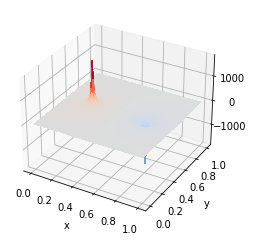

In [5]:
V = ( q / np.sqrt( (X-0.25)**2 + (Y-0.5)**2 ) ) - ( q / np.sqrt( (X-0.75)**2 + (Y-0.5)**2 ) )


fig = plt.figure(2)
ax = fig.gca(projection='3d')
sur = ax.plot_surface( X, Y, V, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False )
plt.xlabel("x")
plt.ylabel("y")
plt.show()